In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/LoanStats_2018Q2.csv')
df.head() 

/Users/sudhani/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,21000.0,21000.0,21000.0,36 months,7.46%,652.85,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,20000.0,20000.0,20000.0,36 months,7.46%,621.76,A,A4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,40000.0,40000.0,40000.0,60 months,20.39%,1068.46,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,34700.0,34700.0,34700.0,60 months,30.75%,1138.71,F,F5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,36000.0,36000.0,36000.0,60 months,10.07%,766.14,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


> Drop columns with only single unique values

In [3]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

df.head() 

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,21000.0,21000.0,21000.0,36 months,7.46%,652.85,A,A4,NaN,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,20000.0,20000.0,20000.0,36 months,7.46%,621.76,A,A4,Nurse Practitioner,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,40000.0,40000.0,40000.0,60 months,20.39%,1068.46,D,D4,Package Handler,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,34700.0,34700.0,34700.0,60 months,30.75%,1138.71,F,F5,Ceo,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,36000.0,36000.0,36000.0,60 months,10.07%,766.14,B,B2,Senior IT Manager,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130776 entries, 0 to 130775
Columns: 142 entries, id to settlement_term
dtypes: float64(104), object(38)
memory usage: 141.7+ MB


In [5]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,130772.000000,130772.000000,130772.000000,130772.000000,1.307720e+05,130446.000000,130772.000000,130772.000000,58400.000000,16558.000000,...,21.0,21.000000,21.0,21.000000,20.000000,21.000000,21.000000,6.000000,6.000000,6.000000
mean,15908.827578,15908.827578,15905.581088,463.119184,7.866513e+04,19.287532,0.235203,0.447389,36.627158,82.719048,...,3.0,202.541429,3.0,2.476190,624.451500,18909.534286,117.702857,3776.416667,64.841667,16.000000
std,10129.848940,10129.848940,10128.950549,286.199796,8.753510e+04,19.478335,0.746970,0.722837,21.685520,23.121349,...,0.0,131.847091,0.0,7.560549,398.030204,11976.261331,231.378121,1855.017855,0.387939,3.098387
min,1000.000000,1000.000000,1000.000000,30.120000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,...,3.0,36.630000,3.0,0.000000,109.890000,3637.060000,0.070000,2291.000000,64.050000,12.000000
25%,8000.000000,8000.000000,8000.000000,251.060000,4.500000e+04,11.090000,0.000000,0.000000,19.000000,68.000000,...,3.0,90.360000,3.0,0.000000,264.202500,9662.490000,0.300000,2815.250000,64.990000,13.500000
50%,13500.000000,13500.000000,13500.000000,381.740000,6.500000e+04,17.385000,0.000000,0.000000,34.000000,86.000000,...,3.0,196.120000,3.0,0.000000,621.375000,16840.930000,1.000000,3109.500000,64.995000,18.000000
75%,21375.000000,21375.000000,21375.000000,627.470000,9.500000e+04,24.730000,0.000000,1.000000,53.000000,101.000000,...,3.0,293.410000,3.0,0.000000,905.122500,30352.100000,133.070000,3817.750000,65.007500,18.000000
max,40000.000000,40000.000000,40000.000000,1628.080000,9.930475e+06,999.000000,23.000000,5.000000,153.000000,127.000000,...,3.0,467.150000,3.0,28.000000,1401.450000,37686.950000,838.680000,7377.500000,65.010000,18.000000


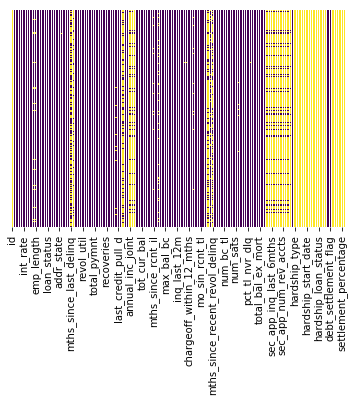

In [7]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

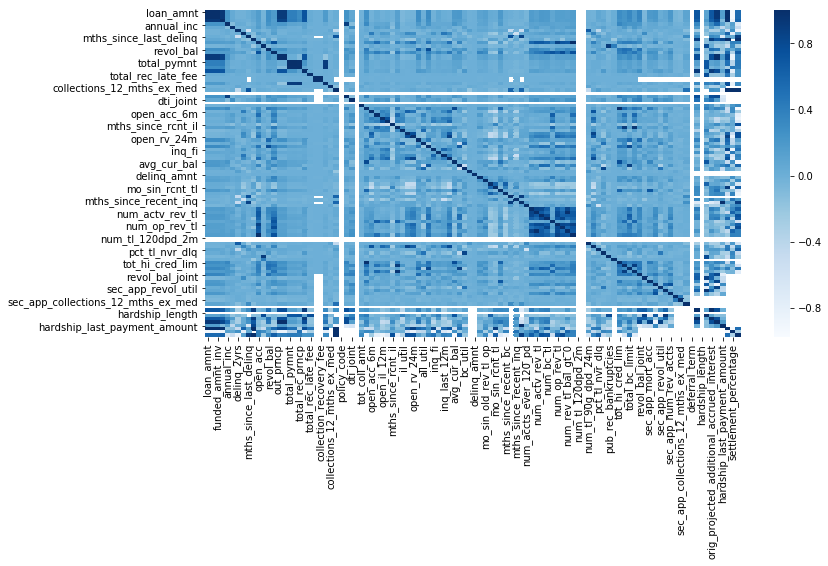

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 